In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import dataset dengan pandas
data = pd.read_csv('/content/drive/MyDrive/kerjaa /data analyst/employee_data.csv', sep=',')

In [ ]:
data.head()

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

,0
ID,0
Gender,0
Experience (Years),0
Position,0
Salary,0


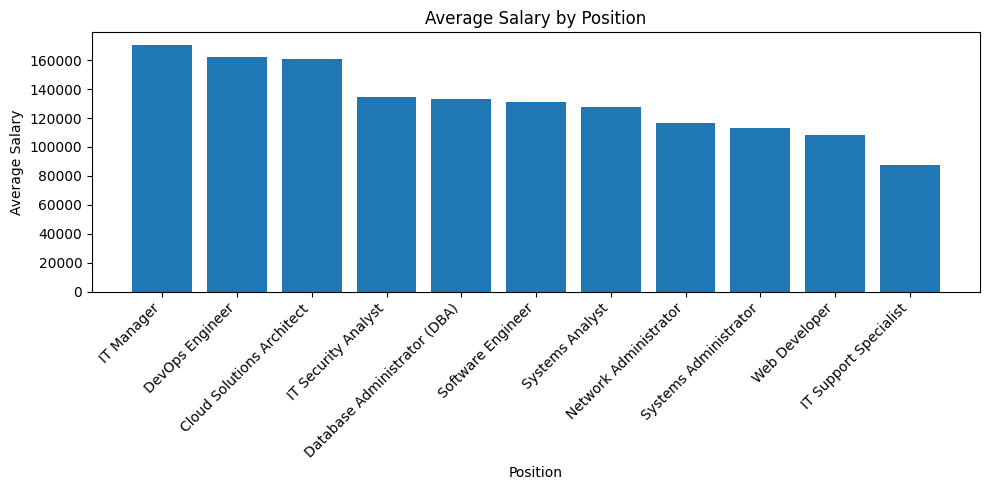

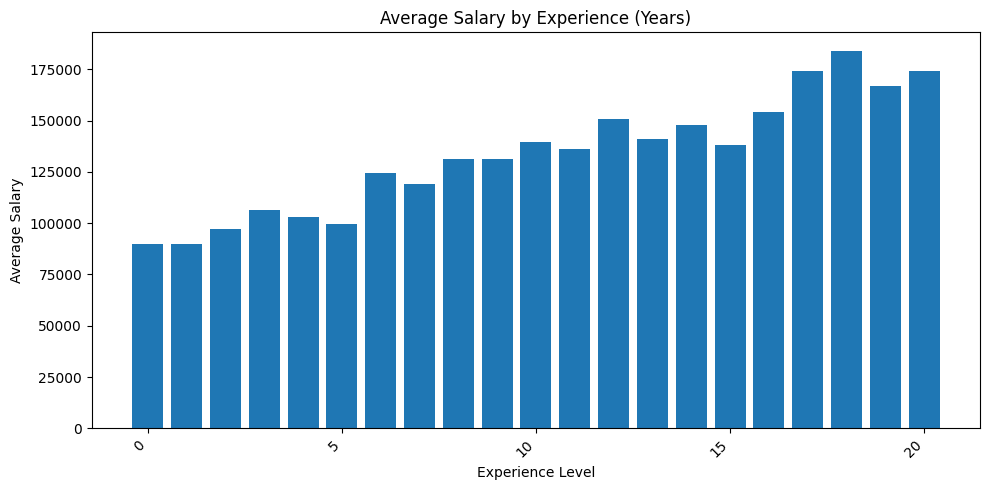

In [ ]:
# Analyzing salary trends based on position and experience

# Group data by position and calculate average salary
salary_by_position = data.groupby('Position')['Salary'].mean().sort_values(ascending=False)

# Group data by experience level and calculate average salary
salary_by_experience = data.groupby('Experience (Years)')['Salary'].mean().sort_values(ascending=False)

# Create bar charts to visualize salary trends
plt.figure(figsize=(10, 5))
plt.bar(salary_by_position.index, salary_by_position.values)
plt.xlabel('Position')
plt.ylabel('Average Salary')
plt.title('Average Salary by Position')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(salary_by_experience.index, salary_by_experience.values)
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.title('Average Salary by Experience (Years)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Training models for salary prediction

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
features = ['Experience (Years)', 'Position']
target = 'Salary'

X = pd.get_dummies(data[features], drop_first=True)
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'{name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print('---')


Linear Regression:
Mean Squared Error: 627080124.5182582
R-squared: 0.6643103379988169
---
Decision Tree:
Mean Squared Error: 1119818263.4401908
R-squared: 0.40053686975683367
---
Random Forest:
Mean Squared Error: 750835322.389823
R-squared: 0.5980614825175337
---


Linear regression is the best

In [ ]:
# Salary prediction using linear regression with another dataset

import pandas as pd
# Assuming you have a new dataset called 'new_data' with the same features
new_data = pd.read_csv('/content/drive/MyDrive/kerjaa /data analyst/employee_data - Copy.csv')  # Replace with actual path

# Preprocess the new data (handle missing values, create dummy variables, etc.)
new_X = pd.get_dummies(new_data[features], drop_first=True)

# Use the trained Linear Regression model to predict salaries
linear_model = LinearRegression()
linear_model.fit(X, y)  # Retrain on the entire original dataset for better accuracy
new_predictions = linear_model.predict(new_X)

# Add predictions to the new dataset
new_data['Predicted Salary'] = new_predictions

# Display the new dataset with predictions
print(new_data)


      ID Gender  Experience (Years)                      Position  \
0      1      F                   4               DevOps Engineer   
1      2      M                   6               DevOps Engineer   
2      3      M                  17                 Web Developer   
3      4      M                   7         Systems Administrator   
4      5      F                  13         Systems Administrator   
..   ...    ...                 ...                           ...   
395  396      F                  19     Cloud Solutions Architect   
396  397      F                  20                 Web Developer   
397  398      F                   9         Network Administrator   
398  399      M                  18  Database Administrator (DBA)   
399  400      F                  11           IT Security Analyst   

     Predicted Salary  
0       130796.523533  
1       139671.539975  
2       141674.224736  
3       100505.581898  
4       127130.631225  
..                ...  
395

                              count           mean           std       min  \
Position                                                                     
Cloud Solutions Architect      30.0  160841.633333  45711.467382   92288.0   
Database Administrator (DBA)   38.0  132864.552632  32989.308937   67396.0   
DevOps Engineer                37.0  161859.081081  38026.718271  103940.0   
IT Manager                     40.0  170711.550000  44586.914858   87871.0   
IT Security Analyst            39.0  134440.820513  38863.676876   70591.0   
IT Support Specialist          31.0   87683.806452  24455.386067   43643.0   
Network Administrator          31.0  116865.064516  30385.225368   61605.0   
Software Engineer              36.0  131357.416667  38248.092780   66956.0   
Systems Administrator          38.0  113117.447368  32081.497420   55964.0   
Systems Analyst                37.0  127658.189189  37746.843766   72006.0   
Web Developer                  43.0  108238.116279  34902.475399

<Figure size 1200x600 with 0 Axes>

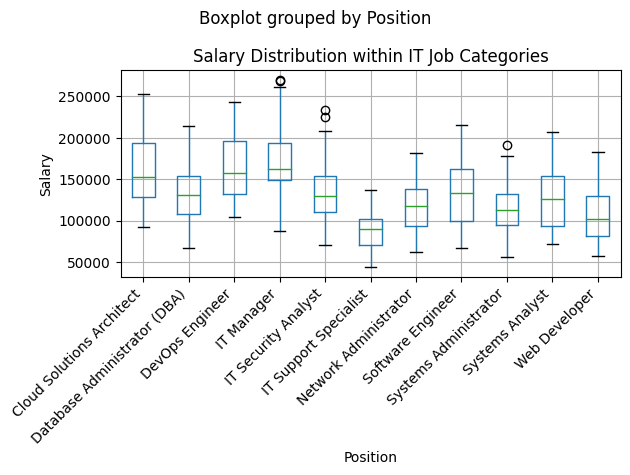

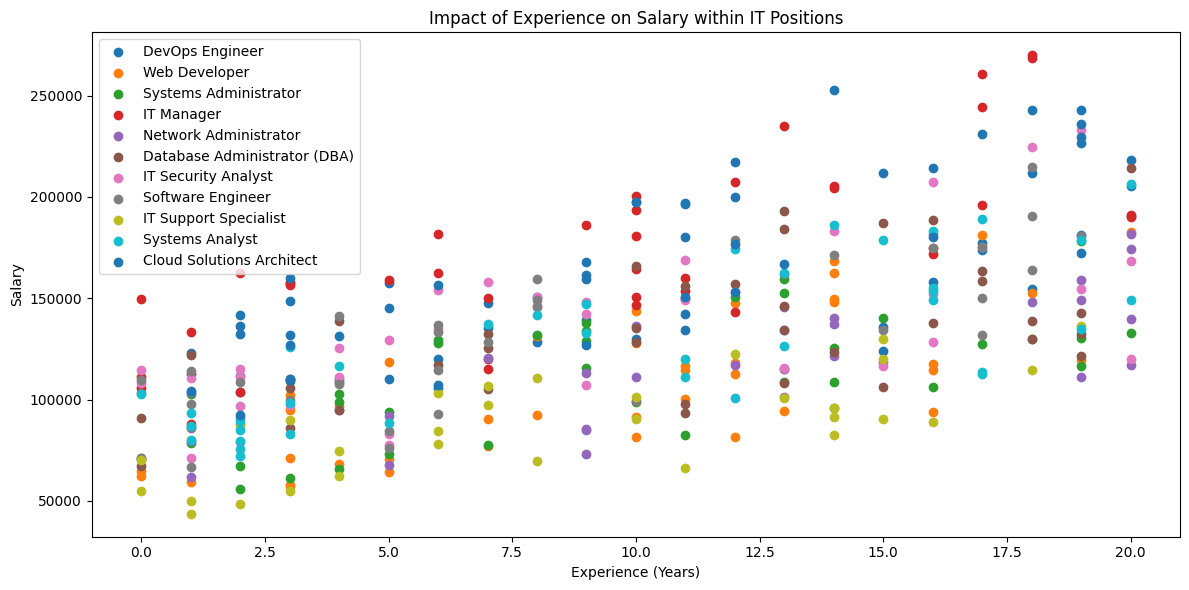

In [ ]:
# Understanding compensation structures in the IT industry


# Analyze salary distribution within different IT job categories
it_positions = ['DevOps Engineer', 'Web Developer', 'Systems Administrator', 'IT Manager', 'Network Administrator', 'Database Administrator (DBA)', 'IT Security Analyst',
                'Software Engineer', 'IT Support Specialist', 'Systems Analyst', 'Cloud Solutions Architect']  # Add more relevant positions

# Filter data for IT positions
it_data = data[data['Position'].isin(it_positions)]
# it_data = data['Position']

# Group data by position and calculate salary statistics
salary_stats_by_position = it_data.groupby('Position')['Salary'].describe()
print(salary_stats_by_position)

# Visualize salary distribution for each IT position using box plots
plt.figure(figsize=(12, 6))
it_data.boxplot(column='Salary', by='Position')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('Salary Distribution within IT Job Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Investigate the impact of experience on salary within each IT position
plt.figure(figsize=(12, 6))
for position in it_positions:
    position_data = it_data[it_data['Position'] == position]
    plt.scatter(position_data['Experience (Years)'], position_data['Salary'], label=position)

plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.title('Impact of Experience on Salary within IT Positions')
plt.legend()
plt.tight_layout()
plt.show()

# Explore the relationship between education level and salary in the IT industry
# (Assuming you have education level information in your dataset)
# ...

# Consider additional factors that might influence compensation, such as location, company size, and industry
# (If you have this data available)
# ...
